# Backpropagation Practice

Implement a 3 input, 4 node hidden-layer, 1 output node Multilayer Perceptron on the following dataset:

| x1 | x2 | x3 | y |
|----|----|----|---|
| 0  | 0  | 1  | 0 |
| 0  | 1  | 1  | 1 |
| 1  | 0  | 1  | 1 |
| 0  | 1  | 0  | 1 |
| 1  | 0  | 0  | 1 |
| 1  | 1  | 1  | 0 |
| 0  | 0  | 0  | 0 |

If you look at the data you'll notice that the first two columns behave like an XOR gate while the last column is mostly just noise. Remember that creating an XOR gate was what the perceptron was criticized for not being able to learn. 

In [5]:
import numpy as np

data = np.array([[0,0,1],
                 [0,1,1],
                 [1,0,1],
                 [0,1,0],
                 [1,0,0],
                 [1,1,1],
                 [0,0,0]
                ])
target = np.array([[0],[1],[1],[1],[1],[0],[0]])

In [224]:
class NeuralNetwork:
    def __init__(self, activator='sigmoid', n_input=3, n_hidden=4, n_output=1):
        self.input = n_input
        self.hidden_nodes = n_hidden
        self.output_nodes = n_output
        self.activator = activator
        
        np.random.seed(422)
        
        self.weights1 = np.random.randn(
            self.input,
            self.hidden_nodes
        )
        self.weights2 = np.random.randn(
            self.hidden_nodes,
            self.output_nodes
        )
        

    def sigmoid(self, x):
        return(1 / (1 + np.exp(-x)))

    def sigmoidPrime(self, x):
        return(x * (1 - x))
    # Set up for multiple activation functions
    def activate(self, x):
        if self.activator == 'sigmoid':
            return(self.sigmoid(x))
    def grad_a(self, x):
        if self.activator == 'sigmoid':
            return(self.sigmoidPrime(x))

    def feed_forward(self, X):
        self.hidden_sum = np.dot(X, self.weights1)
        self.activated_hidden = self.activate(self.hidden_sum)
        self.output_sum = np.dot(self.activated_hidden, self.weights2)
        self.activated_output = self.activate(self.output_sum)
        return self.activated_output

    def backward(self, X, y, o):
        self.o_error = y - o
        self.o_delta = self.o_error * self.grad_a(o)

        self.z2_error = self.o_delta.dot(self.weights2.T)
        self.z2_delta = self.z2_error * self.grad_a(self.activated_hidden)

        self.weights1 += X.T.dot(self.z2_delta)
        self.weights2 += self.activated_hidden.T.dot(self.o_delta)

    def train(self, X, y,):
        o = self.feed_forward(X)
        self.backward(X, y, o)



In [280]:
nn341 = NeuralNetwork(activator='sigmoid')

In [281]:
X = data
y = target

epochs = 500
for i in range(epochs):
    if (i+1 in [1,2,3,4,5]) or ((i+1) % int(epochs / 5) == 0):
        print('+' + '---' * 3 + f'EPOCH {i+1}' + '---' * 3 + '+')
        print('Input: \n', X)
        print('Predicted Output:   Actual Output: \n') 
        for pr, ta in zip(nn341.feed_forward(X), y):
            print(pr, "       ", ta)
        print('Loss: \n', str(np.mean(np.square(y - nn341.feed_forward(X)))))
    nn341.train(X,y)

+---------EPOCH 1---------+
Input: 
 [[0 0 1]
 [0 1 1]
 [1 0 1]
 [0 1 0]
 [1 0 0]
 [1 1 1]
 [0 0 0]]
Predicted Output:   Actual Output: 

[0.25414929]         [0]
[0.18817488]         [1]
[0.23399115]         [1]
[0.13493474]         [1]
[0.163491]         [1]
[0.18292325]         [0]
[0.1766184]         [0]
Loss: 
 0.40330880423665133
+---------EPOCH 2---------+
Input: 
 [[0 0 1]
 [0 1 1]
 [1 0 1]
 [0 1 0]
 [1 0 0]
 [1 1 1]
 [0 0 0]]
Predicted Output:   Actual Output: 

[0.37271945]         [0]
[0.32261701]         [1]
[0.36002662]         [1]
[0.21797027]         [1]
[0.22952303]         [1]
[0.33930026]         [0]
[0.2390464]         [0]
Loss: 
 0.3406866504491725
+---------EPOCH 3---------+
Input: 
 [[0 0 1]
 [0 1 1]
 [1 0 1]
 [0 1 0]
 [1 0 0]
 [1 1 1]
 [0 0 0]]
Predicted Output:   Actual Output: 

[0.48602072]         [0]
[0.46850524]         [1]
[0.47844971]         [1]
[0.32202024]         [1]
[0.29984385]         [1]
[0.50184867]         [0]
[0.3084659]         [0]
Loss: 
 0.2

## Try building/training a more complex MLP on a bigger dataset.

Use the [MNIST dataset](http://yann.lecun.com/exdb/mnist/) to build the cannonical handwriting digit recognizer and see what kind of accuracy you can achieve. 

If you need inspiration, the internet is chalk-full of tutorials, but I want you to see how far you can get on your own first. I've linked to the original MNIST dataset above but it will probably be easier to download data through a neural network library. If you reference outside resources make sure you understand every line of code that you're using from other sources, and share with your fellow students helpful resources that you find.


In [51]:
from __future__ import print_function
#import gzip
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import shutil
import struct as st

#import os
#import sys

try:
    from urllib.request import urlretrieve
except ImportError:
    from urllib import urlretrieve

# Config matplotlib for inline plotting
%matplotlib inline

In [238]:
class Mnist_loader:
    
    def __init__(self, abs_directory='/'):
        self.abs_directory = abs_directory
    
    def load_data(self, fname):
        datafile = open(str(self.abs_directory + fname), 'rb')
        
        #Skip to 4th byte to get size info
        datafile.seek(4)
        
        num_arrays = st.unpack('>I',datafile.read(4))[0]
        arr_rows = st.unpack('>I',datafile.read(4))[0]
        arr_cols = st.unpack('>I',datafile.read(4))[0]
        print('Number of images, Rows per image, Columns per image')
        print(num_arrays, arr_rows, arr_cols)
        
        num_bytes_total = num_arrays * arr_rows * arr_cols
                
        data_array = 255 - (np.asarray(st.unpack('>'+'B'*num_bytes_total,
                                                 datafile
                                                 .read(num_bytes_total)))
                            .reshape((num_arrays,(arr_rows*arr_cols)))
                           )
        
        self.data_array = data_array
        if len(self.data_array) > 1:
            print('Successfully loaded {}'.format(fname))
            print('Size: ', self.data_array.shape)
        else:
            print('There was an error')
        
    
    def load_labels(self, fname):
        labelfile = open(str(self.abs_directory + fname), 'rb')
        labelfile.seek(4)
        numL =  st.unpack('>I',labelfile.read(4))[0]
        tl_array = np.asarray(st.unpack('>'+'B'*numL,labelfile.read(numL)))
        self.labels_list = tl_array
        if len(self.labels_list) > 1:
            print('Successfully loaded {}'.format(fname))
            print('Size: ', self.labels_list.shape)
        else:
            print('There was an error')
        
    def return_labels_data(self, lab_fname, data_fname):
        self.load_data(data_fname)
        self.load_labels(lab_fname)
        return(self.data_array, self.labels_list)
        
        
        

In [239]:
mnl = Mnist_loader(abs_directory=str('/home/joe2/Documents/LambdaSchool/unit4/sprint2/mnist_data/'))
mndata, mnlabels = mnl.return_labels_data('train-labels.idx1-ubyte', 'train-images.idx3-ubyte')

Number of images, Rows per image, Columns per image
60000 28 28
Successfully loaded train-images.idx3-ubyte
Size:  (60000, 784)
Successfully loaded train-labels.idx1-ubyte
Size:  (60000,)


Image Label:  3


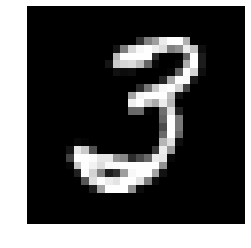

In [223]:
sample_number = 10099
plt.imshow(mndata[sample_number], cmap="gray_r")
plt.axis('off')
print("Image Label: ", mnlabels[sample_number])

In [236]:
train_images_array[500].shape

(28, 28)

In [242]:
class NeuralNetwork2:
    def __init__(self, activator='sigmoid', n_input=3, n_hidden=4, n_output=1):
        self.input = n_input
        self.hidden_nodes = n_hidden
        self.output_nodes = n_output
        self.activator = activator
        
        np.random.seed(422)
        
        self.weights1 = np.random.randn(
            self.input,
            self.hidden_nodes
        )
        self.weights2 = np.random.randn(
            self.hidden_nodes,
            self.output_nodes
        )
        

    def sigmoid(self, x):
        return(1 / (1 + np.exp(-x)))

    def sigmoidPrime(self, x):
        return(x * (1 - x))
    # Set up for multiple activation functions
    def activate(self, x):
        if self.activator == 'sigmoid':
            return(self.sigmoid(x))
    def grad_a(self, x):
        if self.activator == 'sigmoid':
            return(self.sigmoidPrime(x))

    def feed_forward(self, X):
        self.hidden_sum = np.dot(X, self.weights1)
        self.activated_hidden = self.activate(self.hidden_sum)
        self.output_sum = np.dot(self.activated_hidden, self.weights2)
        self.activated_output = self.activate(self.output_sum)
        return self.activated_output

    def backward(self, X, y, o):
        self.o_error = y - o
        self.o_delta = self.o_error * self.grad_a(o)

        self.z2_error = self.o_delta.dot(self.weights2.T)
        self.z2_delta = self.z2_error * self.grad_a(self.activated_hidden)

        self.weights1 += X.T.dot(self.z2_delta)
        self.weights2 += self.activated_hidden.T.dot(self.o_delta)

    def train(self, X, y,):
        o = self.feed_forward(X)
        self.backward(X, y, o)

In [243]:
mNN = NeuralNetwork2(activator='sigmoid', n_input=784, n_hidden=100, n_output=10)

In [284]:
mndata_norm = mndata / np.amax(mndata)
mndata_norm[0]

array([1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.     

In [269]:
np.reshape(mnlabels, (-1,1))[:4]
encoded_mnlabels = []
ldict = {0:[1,0,0,0,0,0,0,0,0,0],
         1:[0,1,0,0,0,0,0,0,0,0],
         2:[0,0,1,0,0,0,0,0,0,0],
         3:[0,0,0,1,0,0,0,0,0,0],
         4:[0,0,0,0,1,0,0,0,0,0],
         5:[0,0,0,0,0,1,0,0,0,0],
         6:[0,0,0,0,0,0,1,0,0,0],
         7:[0,0,0,0,0,0,0,1,0,0],
         8:[0,0,0,0,0,0,0,0,1,0],
         9:[0,0,0,0,0,0,0,0,0,1]
        }
invert = lambda d: dict(zip(d.values(), d.keys()))
for i in mnlabels:
    encoded_mnlabels.append(ldict[i])
mnnp_enc = np.asarray(encoded_mnlabels)

In [261]:
mnnp_enc.shape

(60000, 10)

In [271]:
def convert_back(lst):
    for i in range(len(lst)):
        if lst[i] == 1:
            return(i)


In [273]:
convert_back(mnnp_enc[2])

4

In [287]:
X = mndata_norm
# y = np.reshape(mnlabels, (-1,1))
y = mnnp_enc

epochs = 10
for i in range(epochs):
    if (i+1 in [1,5,10]) or ((i+1) % int(epochs / 2) == 0):
        
        print('+' + '---' * 3 + f'EPOCH {i+1}' + '---' * 3 + '+')
        print('Input: \n', X[:20])
#        print('Predicted Output:   Actual Output: \n') 
#         for pr, ta in zip(mNN.feed_forward(X), y):
#             print(convert_back(pr), "       ", convert_back(ta))
        if ((i+1 == epochs / 2) or (i+1 == epochs)):
            for pr, ta in zip(mNN.feed_forward(X)[:20], y[:20]):
                print(pr, ta)
                print(convert_back(pr), "       ", convert_back(ta))
        print('Loss: \n', str(np.mean(np.square(y - mNN.feed_forward(X)))))
    mNN.train(X,y)


+---------EPOCH 1---------+
Input: 
 [[1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 ...
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]]
Loss: 
 0.9
+---------EPOCH 5---------+
Input: 
 [[1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 ...
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]]
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.] [0 0 0 0 0 1 0 0 0 0]
0         5
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.] [1 0 0 0 0 0 0 0 0 0]
0         0
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.] [0 0 0 0 1 0 0 0 0 0]
0         4
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.] [0 1 0 0 0 0 0 0 0 0]
0         1
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.] [0 0 0 0 0 0 0 0 0 1]
0         9
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.] [0 0 1 0 0 0 0 0 0 0]
0         2
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.] [0 1 0 0 0 0 0 0 0 0]
0         1
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.] [0 0 0 1 0 0 0 0 0 0]
0         3
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.] [0 1 0 0 0 0 0 0 0 0]
0         1
[1. 1. 1

In [277]:
epochs = 100
for i in range(epochs):
    if (i+1 in [1,2,3,4,5]) or ((i+1) % int(epochs / 2) == 0):
        print(i, (1 + 1 % (epochs/2)))

0 2.0
1 2.0
2 2.0
3 2.0
4 2.0
49 2.0
99 2.0


## Stretch Goals: 

- Implement Cross Validation model evaluation on your MNIST implementation 
- Research different [Gradient Descent Based Optimizers](https://keras.io/optimizers/)
 - [Siraj Raval the evolution of gradient descent](https://www.youtube.com/watch?v=nhqo0u1a6fw)
- Build a housing price estimation model using a neural network. How does its accuracy compare with the regression models that we fit earlier on in class?